# Importing the Text Books

In [1]:
import nltk
import re
import matplotlib.pyplot as plt

In [2]:
filename1 = r"C:\Users\Ayush\Desktop\NLP\Project\Project1\Gatsby.txt"

f1 = open(str(filename1), 'r', encoding="utf8")

corpus1 = f1.read()
f1.close()

# print(corpus1)

In [3]:
filename2 = r"C:\Users\Ayush\Desktop\NLP\Project\Project1\Pride.txt"

f2 = open(str(filename2), 'r', encoding="utf8")

corpus2 = f2.read()
f2.close()

# print(corpus2)

# Text Pre-processing

### Book 1 

In [4]:
corpus1_clean = corpus1[corpus1.find("Thomas")+len("Thomas Parke d’Invilliers"):corpus1.find("*** END OF THE PROJECT GUTENBERG EBOOK")]
corpus1_clean = re.sub(r'\n{3}.*\n\n+', '\n\n', corpus1_clean)

# print(corpus1_clean)

### Book 2

In [5]:
corpus2_clean = corpus2[corpus2.find("Chapter 61")+len("Chapter 61"):corpus2.find("*** END OF THE PROJECT GUTENBERG EBOOK")]
corpus2_clean = re.sub(r'\n{4}Chapter.*\n\n+', '\n\n', corpus2_clean)

# print(corpus2_clean)

# Tokenization

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize

### Book 1

In [7]:
gatsby_words = word_tokenize(corpus1_clean)

print(len(gatsby_words))

# print(gatsby_words)

60510


### Book 2

In [8]:
pride_words = word_tokenize(corpus2_clean)

print(len(pride_words))

# print(pride_words)

142455


# Removal of special characters and numbers

In [9]:
punctuation = re.compile(r"[^a-zA-Z]+")
token_gatsby = []
for words in gatsby_words:
  words = punctuation.sub("", words)
  if len(words) > 0:
    token_gatsby.append(words.lower())
    
# print(token_gatsby)

In [10]:
punctuation = re.compile(r"[^a-zA-Z]+")
token_pride = []
for words in pride_words:
  words = punctuation.sub("", words)
  if len(words) > 0:
    token_pride.append(words.lower())
    
# print(token_pride)

# Frequency Distribution

In [11]:
from nltk.probability import FreqDist

### Book 1

In [12]:
fdist_gatsby = FreqDist()

for word in token_gatsby:
    fdist_gatsby[word] += 1
    
# for key,val in fdist_gatsby.items():
#     print(str(key) + ':' + str(val))

In [13]:
fdist_top20_g = fdist_gatsby.most_common(20)

fdist_top20_g

[('the', 2379),
 ('and', 1529),
 ('a', 1394),
 ('i', 1376),
 ('to', 1127),
 ('of', 1110),
 ('he', 836),
 ('in', 801),
 ('was', 764),
 ('that', 624),
 ('it', 584),
 ('you', 515),
 ('his', 491),
 ('s', 472),
 ('with', 420),
 ('t', 412),
 ('she', 407),
 ('at', 404),
 ('her', 390),
 ('had', 381)]

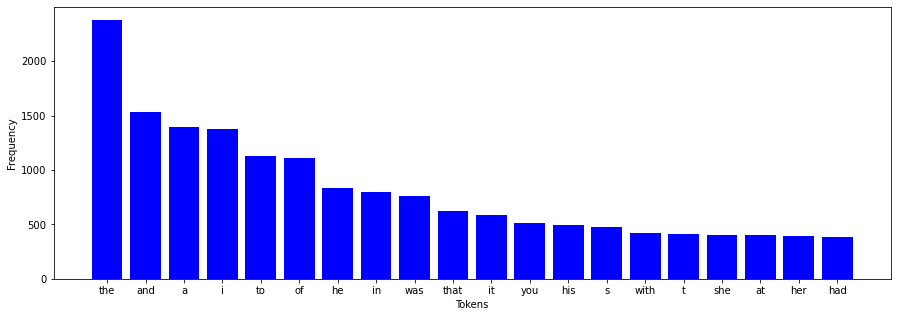

In [14]:
word_g = []
freq_g = []

for w, f in fdist_top20_g:
    word_g.append(w)
    freq_g.append(f)

plt.figure(figsize=(15, 5))
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.bar(word_g , freq_g, color='blue')
plt.show()

### Book 2

In [15]:
fdist_pride = FreqDist()

for word in token_pride:
    fdist_pride[word] += 1

# for key,val in fdist_pride.items():
#     print(str(key) + ':' + str(val))

In [16]:
fdist_top20_p = fdist_pride.most_common(20)

fdist_top20_p

[('the', 4324),
 ('to', 4130),
 ('of', 3601),
 ('and', 3533),
 ('her', 2217),
 ('i', 2054),
 ('a', 1938),
 ('in', 1861),
 ('was', 1844),
 ('she', 1705),
 ('that', 1570),
 ('not', 1537),
 ('it', 1522),
 ('you', 1349),
 ('he', 1334),
 ('his', 1268),
 ('be', 1238),
 ('as', 1182),
 ('had', 1175),
 ('with', 1052)]

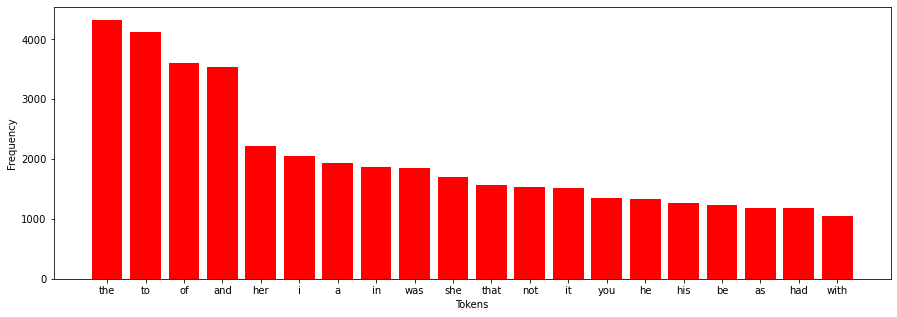

In [17]:
word_p = []
freq_p = []

for w, f in fdist_top20_p:
    word_p.append(w)
    freq_p.append(f)

plt.figure(figsize=(15, 5))
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.bar(word_p , freq_p, color='red')
plt.show()

# Word Cloud

In [18]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

### Book 1

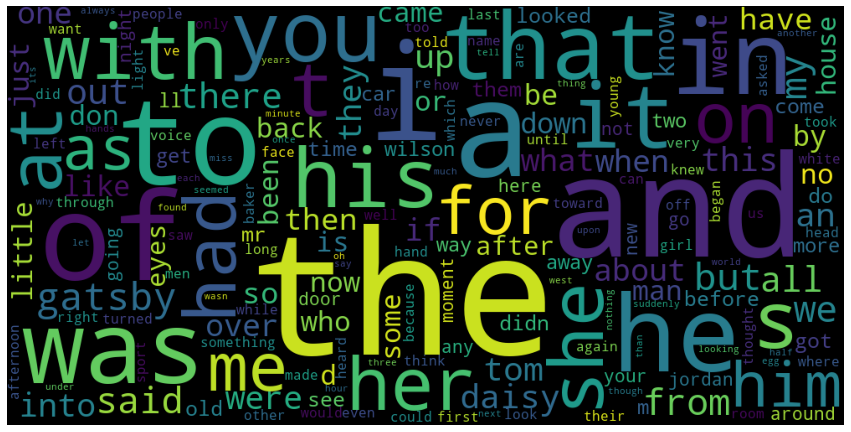

In [19]:
word_could_dict1 = fdist_gatsby
wordcloud1 = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict1)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

### Book 2

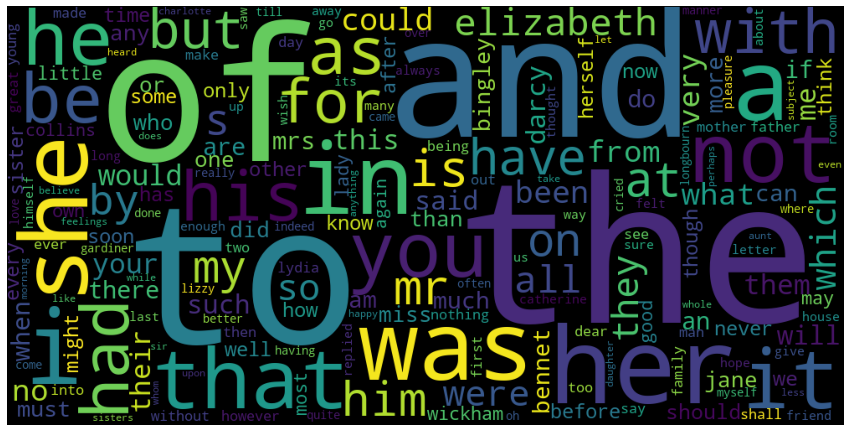

In [20]:
word_could_dict2 = fdist_pride
wordcloud2 = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict2)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()
plt.close()

# Removal of Stopwords

In [21]:
from nltk.corpus import stopwords

### Book 1

In [22]:
clean_tokens_g = []

for token in token_gatsby:
    if token not in stopwords.words('english'):
        clean_tokens_g.append(token)


freq_new_g = nltk.FreqDist(clean_tokens_g)   
# for key,val in freq_new_g.items():
#     print(str(key) + ':' + str(val))

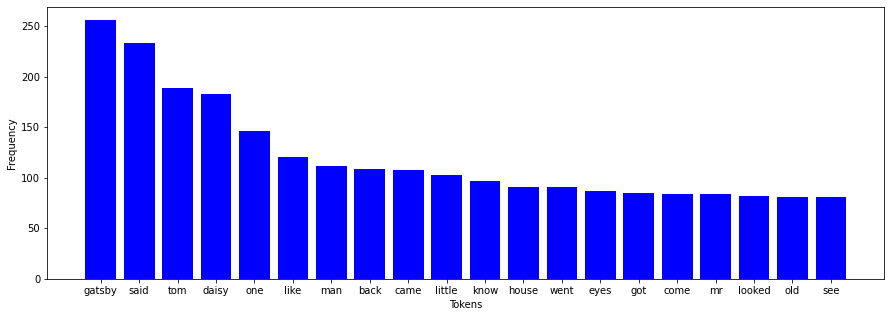

In [23]:
fdist_top20_g = freq_new_g.most_common(20)

word_g = []
freq_g = []

for w, f in fdist_top20_g:
    word_g.append(w)
    freq_g.append(f)

plt.figure(figsize=(15, 5))
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.bar(word_g, freq_g, color = 'blue')
plt.show()

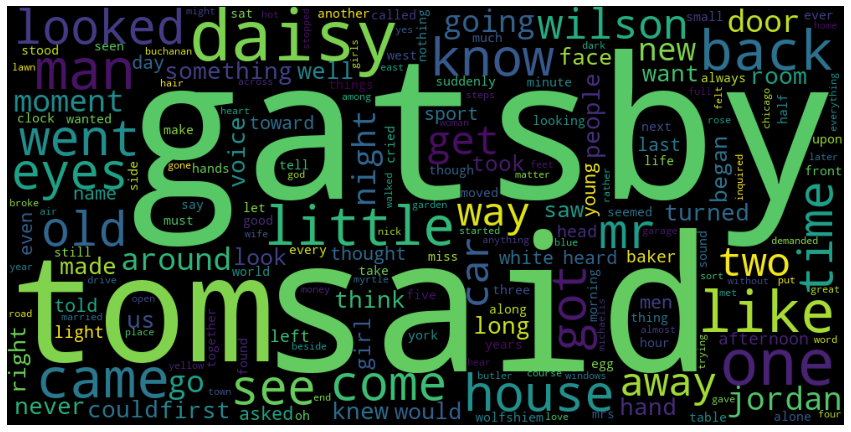

In [24]:
word_cloud_dict_g = freq_new_g
wordcloud_new_g = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_cloud_dict_g)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_new_g)
plt.axis("off")
plt.show()
plt.close()

### Book 2

In [25]:
clean_tokens_p = []

for token in token_pride:
    if token not in stopwords.words('english'):
        clean_tokens_p.append(token)
                
            
freq_new_p = nltk.FreqDist(clean_tokens_p)   
# for key,val in freq_new_p.items():
#     print(str(key) + ':' + str(val))

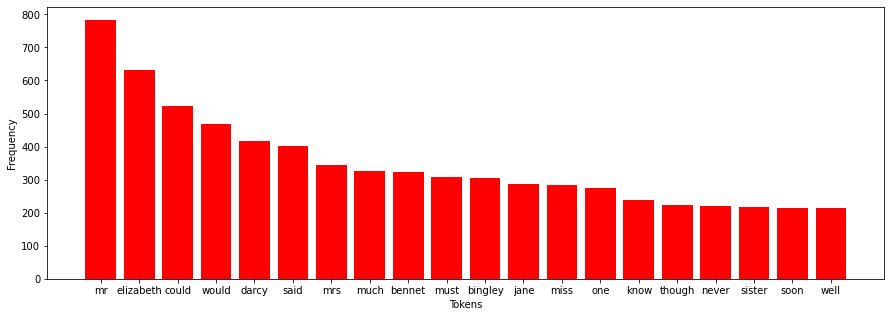

In [26]:
fdist_top20_p = freq_new_p.most_common(20)

word_p = []
freq_p = []

for w, f in fdist_top20_p:
    word_p.append(w)
    freq_p.append(f)

plt.figure(figsize=(15, 5))
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.bar(word_p, freq_p, color = 'red')
plt.show()

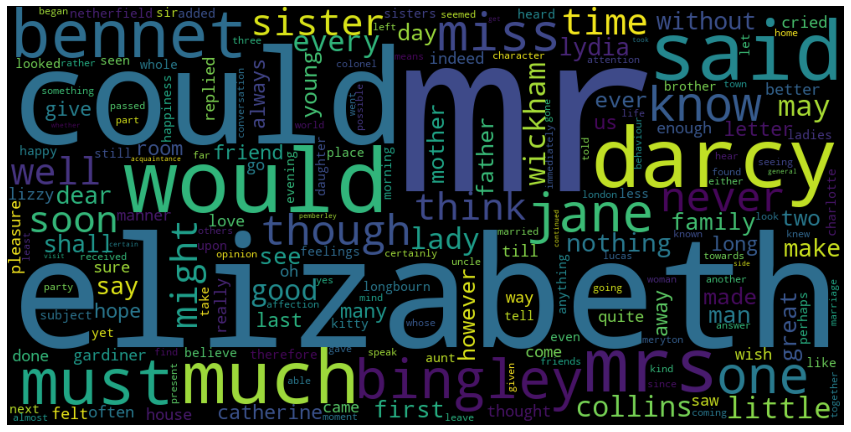

In [27]:
word_could_dict_p = freq_new_p
wordcloud_new_p = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict_p)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_new_p)
plt.axis("off")
plt.show()
plt.close()

# Frequency Distribution for Word Length

### Book 1

In [28]:
import pandas as pd

fdist_len_g = FreqDist()
for word in clean_tokens_g:
    fdist_len_g[len(word)] += 1

df_g = pd.DataFrame(sorted(list(fdist_len_g.items())), columns = ['Length', 'Frequency'], index=None)
print(df_g)

    Length  Frequency
0        1         26
1        2        278
2        3       2171
3        4       5198
4        5       4274
5        6       3903
6        7       2607
7        8       1902
8        9       1358
9       10        733
10      11        413
11      12        238
12      13        129
13      14         51
14      15         19
15      16         18
16      17          7
17      18          2
18      19          2
19      20          1
20      24          1


### Book 2

In [29]:
fdist_len_p = FreqDist()
for word in clean_tokens_p:
    fdist_len_p[len(word)] += 1

df_p = pd.DataFrame(sorted(list(fdist_len_p.items())), columns = ['Length', 'Frequency'])
print(df_p)

    Length  Frequency
0        1         11
1        2       1159
2        3       3032
3        4      10334
4        5       9135
5        6       8187
6        7       7722
7        8       5012
8        9       4937
9       10       2318
10      11       1419
11      12        838
12      13        409
13      14        124
14      15         47
15      16         12
16      17          7
17      18          2
18      19          2
19      20          1
20      21          1
21      23          1
22      26          1


### Relationship between the frequency distribution for word length for Book 1 and Book 2

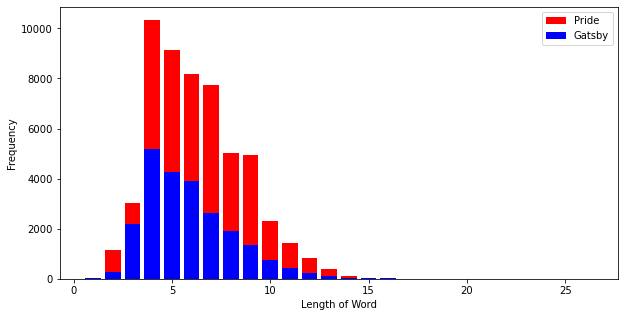

In [30]:
plt.figure(figsize=(10, 5))
plt.xlabel("Length of Word")
plt.ylabel("Frequency")
plt.bar(df_p["Length"], df_p["Frequency"], color='red', label='Pride')
plt.bar(df_g["Length"], df_g["Frequency"], color='blue', label='Gatsby')
plt.legend()
plt.show()

# Parts of Speech Tagging

## Book 1

In [31]:
gatsby_pos = nltk.pos_tag(clean_tokens_g)
gatsby_pos = list(map(list, gatsby_pos))

# print(gatsby_pos)

In [32]:
from collections import Counter
pos_tag_g = Counter(tag for _, tag in gatsby_pos)

for k, v in sorted(pos_tag_g.items(), key=lambda kv: kv[1], reverse=True):
    print(f"{k}: {v}")

NN: 7582
JJ: 4434
VBD: 2762
RB: 1946
NNS: 1672
VBG: 949
VBN: 872
VBP: 763
IN: 595
VB: 521
CD: 344
MD: 202
VBZ: 186
JJS: 73
DT: 72
PRP: 66
JJR: 65
RP: 65
RBR: 58
FW: 28
CC: 17
NNP: 12
WP: 11
WDT: 9
UH: 9
WP$: 9
WRB: 6
EX: 1
PDT: 1
PRP$: 1


## Frequency Distribution of Tags

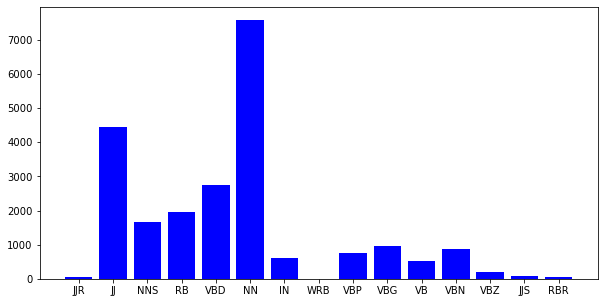

In [33]:
tags_g = []
freq_g = []
for k, v in pos_tag_g.items():
    tags_g.append(k)
    freq_g.append(v)

    
plt.figure(figsize=(10, 5))
plt.bar(tags_g[:15], freq_g[:15], color='blue')
plt.show()

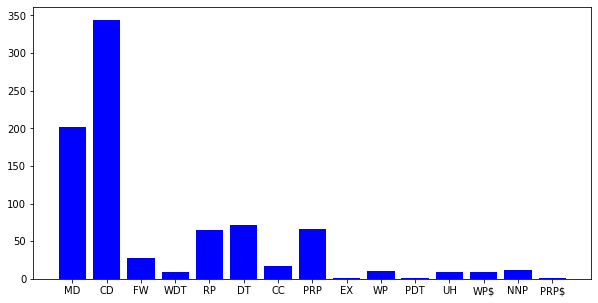

In [34]:
plt.figure(figsize=(10, 5))
plt.bar(tags_g[15:], freq_g[15:], color='blue')
plt.show()

## Book 2

In [35]:
pride_pos = nltk.pos_tag(clean_tokens_p)
pride_pos = list(map(list, pride_pos))

# print(pride_pos)

In [36]:
pos_tag_p = Counter(tag for _, tag in pride_pos)

for k, v in sorted(pos_tag_p.items(), key=lambda kv: kv[1], reverse=True):
    print(f"{k}: {v}")

NN: 17371
JJ: 9870
RB: 5215
VBD: 4286
NNS: 3521
VB: 2384
VBG: 2101
VBN: 2091
VBP: 2037
MD: 1903
IN: 1085
CD: 600
VBZ: 522
JJS: 308
DT: 290
RBR: 241
JJR: 240
FW: 166
PRP: 132
CC: 89
WP$: 59
RP: 58
WDT: 39
UH: 28
WRB: 25
NNP: 18
WP: 13
PRP$: 9
RBS: 5
PDT: 3
POS: 2


## Frequency Distribution of Tags

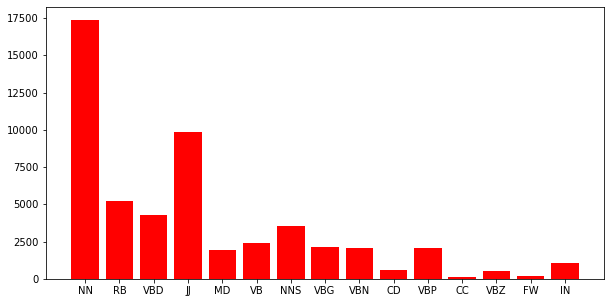

In [37]:
tags_p = []
freq_p = []
for k, v in pos_tag_p.items():
    tags_p.append(k)
    freq_p.append(v)
    
plt.figure(figsize=(10, 5))
plt.bar(tags_p[:15], freq_p[:15], color='red')
plt.show()

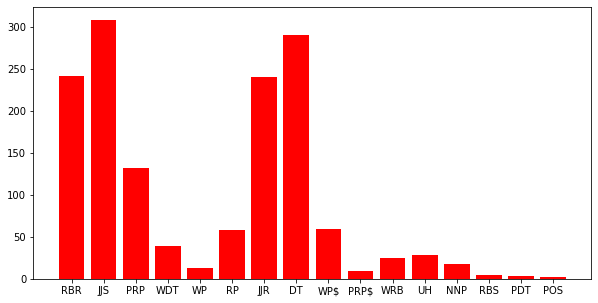

In [38]:
plt.figure(figsize=(10, 5))
plt.bar(tags_p[15:], freq_p[15:], color='red')
plt.show()